In [2]:
from matplotlib.pyplot import figure, plot, grid, legend, axes
from numpy import sin, linspace, random
from scipy.constants import pi

Según MC la integral da como resultado 295.9600


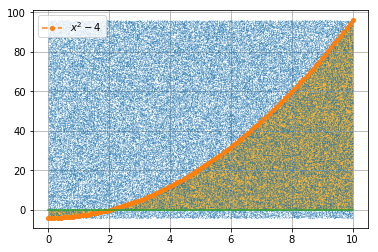

In [35]:
###########################
#Integración por MonteCarlo
###########################

N =int(1e5)
x1=0
x2=10
x = linspace(x1,x2,100)
#f = sin(x)
f = x**2 - 4
name = r'$x^2 - 4$'
s2=random.uniform(min(f),max(f),N)
s1=random.uniform(x1,x2,N)
s=[s1,s2]



#Integración

#Contador de puntos en la region designada por f[x] y y=0

in_points=0
for i in range(N):
    
    #Creo una tupla con los valores x,y en el plano
    point = (s[0][i],s[1][i])
    #calculamos el valor de la función
    value = (point[0])**2 - 4
    #Contador de puntos
    if value >= 0 and point[1]>=0 and point[1]<=value: in_points+=1
    if value < 0 and point[1]<=0 and point[1]>=value: in_points-=1
    

#graficación
figure()
ax = axes()
ax.fill_between(x, f, y2=0, alpha=0.8, color='orange')
ax.plot(s[0],s[1],'.',markersize=0.2)
plot(x, f,'--o', markersize=4, label= name)
plot(x,[0 for i in x])
legend(loc='best')
grid()


#valor final
val = abs(x2-x1)*abs(max(f)-min(f))*in_points/N
print('Según MC la integral da como resultado {:.4f}'.format(val))

Según MC la integral da como resultado 0.8707


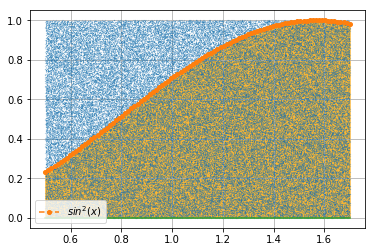

In [37]:
###########################
#Integración por MonteCarlo
###########################

N =int(1e5)
x1=0.5
x2=1.7
x = linspace(x1,x2,100)
f = sin(x)**2

name = r'$sin^2 (x)$'
s2=random.uniform(0,max(f),N)
s1=random.uniform(x1,x2,N)
s=[s1,s2]



#Integración

#Contador de puntos en la region designada por f[x] y y=0

in_points=0
for i in range(N):
    
    #Creo una tupla con los valores x,y en el plano
    point = (s[0][i],s[1][i])
    #calculamos el valor de la función
    value = sin(point[0])**2
    #Contador de puntos
    if value >= 0 and point[1]>=0 and point[1]<=value: in_points+=1
    if value < 0 and point[1]<=0 and point[1]>=value: in_points-=1
    

#graficación
figure()
ax = axes()
ax.fill_between(x, f, y2=0, alpha=0.8, color='orange')
ax.plot(s[0],s[1],'.',markersize=0.2)
plot(x, f,'--o', markersize=4, label= name)
plot(x,[0 for i in x])
legend()
grid()


#valor final
val = abs(x2-x1)*abs(max(f)-0)*in_points/N
print('Según MC la integral da como resultado {:.4f}'.format(val))

In [38]:
from scipy.optimize import curve_fit
from numpy import sin,exp


#######################
#Muestreo de importancia
#######################


#Definimos una función de distribución normal
def normal(x, amp, cen, anc): #amplitud, centro, ancho
    return amp*exp(-(x-cen)**2/anc)


#funciones a integrar
def f1(x):
    return x**2 - 4
def f2(x):
    return sin(x)**2      
    



Según MC la integral da como resultado 263.4222


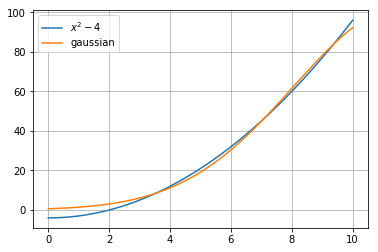

In [44]:
N =int(1e3)
x1= 0
x2= 10
x = linspace(x1,x2,N)
f = f1(x)


val_init = [2,4,1]
opt_val,cov = curve_fit(normal, x, f, val_init)
p = normal(x,opt_val[0],opt_val[1],opt_val[2])

plot(x,f,label='$x^2 - 4$')
plot(x,p, label='gaussian')
legend(loc='best')
grid()

val = 0
for i in range(0,len(f)):
    val += f[i]/p[i]
val = abs(x2-x1)*abs(max(f)-min(f))*val/N
print('Según MC la integral da como resultado {:.4f}'.format(val))



Según MC la integral da como resultado 0.9209


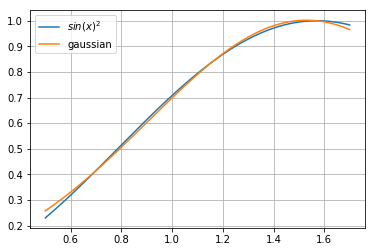

In [45]:
N =int(1e3)
x1= 0.5
x2= 1.7
x = linspace(x1,x2,N)
f = f2(x)


val_init = [2,4,1]
opt_val,cov = curve_fit(normal, x, f, val_init)
p = normal(x,opt_val[0],opt_val[1],opt_val[2])

plot(x,f,label='$sin(x)^2$')
plot(x,p, label='gaussian')
legend(loc='best')
grid()


val = 0
for i in range(0,len(f)):
    val += f[i]/p[i]
val = abs(x2-x1)*abs(max(f)-min(f))*val/N
print('Según MC la integral da como resultado {:.4f}'.format(val))
